# Analyzing Customer Reviews from Amazon

### Analysis of the data and Rating prediction

The purpose of this project is to analyze customer reviews of different headphones listings on Amazon. The reviews will be split into "good" and "bad" sets, and the review texts will be processed into tokens consisting of individual words. These will form the "good" and "bad" review corpuses that will be analyzed to determine the most important words in either good and bad review sets. They will also be used to predict if a review will be "good" or "bad."

This analysis has many real-world applications. While customers can manually include ratings for the product in their reviews, this rating is only an overall statement

In [1]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

In [2]:
### Installation of packages

# tm: Text mining packge
# SnowballC: Stopwords dictionary
# ggplot2: Plotting data
# wordcloud: Making word clouds from the data
# RColorBrewer: Additional color palettes for plots
# e1071: SVM modeling

install.packages('tm')
install.packages('SnowballC')
install.packages("vctrs", type = "binary", dependencies = TRUE, repos = "https://cloud.r-project.org")
install.packages("ggplot2",
                 type = "binary",
                 dependencies = TRUE,
                 repos = "https://cloud.r-project.org")
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('e1071')



  There is a binary version available but the source version is later:
   binary source needs_compilation
tm  0.7-8  0.7-9              TRUE

  Binaries will be installed
package 'tm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tm'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\tm\libs\x64\tm.dll to C:\Users\johnt\anaconda3\Lib\R\library\tm\libs\x64\tm.dll: Permission denied"Warning message:
"restored 'tm'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\RtmpIdVXzC\downloaded_packages
package 'SnowballC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'SnowballC'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\SnowballC\libs\x64\SnowballC.dll to C:\Users\johnt\anaconda3\Lib\R\library\SnowballC\libs\x64\SnowballC.dll: Permission denied"Warning message:
"restored 'SnowballC'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\RtmpIdVXzC\downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
      binary source
vctrs  0.3.8  0.4.2

package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll to C:\Users\johnt\anaconda3\Lib\R\library\vctrs\libs\x64\vctrs.dll: Permission denied"Warning message:
"restored 'vctrs'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\RtmpIdVXzC\downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
        binary source
ggplot2  3.3.3  3.3.6

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\RtmpIdVXzC\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'wordcloud'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\wordcloud\libs\x64\wordcloud.dll to C:\Users\johnt\anaconda3\Lib\R\library\wordcloud\libs\x64\wordcloud.dll: Permission denied"Warning message:
"restored 'wordcloud'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\RtmpIdVXzC\downloaded_packages

  There is a binary version available but the source version is later:
             binary source needs_compilation
RColorBrewer  1.1-2  1.1-3             FALSE



installing the source package 'RColorBrewer'




  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6 1.7-11              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\johnt\anaconda3\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\johnt\anaconda3\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"Warning message:
"restored 'e1071'"


The downloaded binary packages are in
	C:\Users\johnt\AppData\Local\Temp\RtmpIdVXzC\downloaded_packages


In [3]:
library(tm)
library(SnowballC)
library(ggplot2)
library(wordcloud)
library(RColorBrewer)
library(e1071)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [4]:
### Importing the review dataset

df_data = read.csv("AllProductReviews.csv", encoding = 'UTF-8')

n_reviews = nrow(df_data)

cat('Number of columns:', length(df_data), '\n')
cat('Number of rows:', n_reviews)

head(df_data)

Number of columns: 4 
Number of rows: 14337

ReviewTitle,ReviewBody,ReviewStar,Product
Honest review of an edm music lover,No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.,3,boAt Rockerz 255
Unreliable earphones with high cost,"This earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.",1,boAt Rockerz 255
Really good and durable.,"i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.",4,boAt Rockerz 255
stopped working in just 14 days,Its sound quality is adorable. overall it was good but just for 2 weeks after that it stopped working and since then it never powered on again. I am claiming for warrenty and it is still undergoing.,1,boAt Rockerz 255
Just Awesome Wireless Headphone under 1000...<U+0001F609>,Its Awesome... Good sound quality & 8-9 hrs battery life... Just waww look... <U+0001F609> I brought just 999 rupees...But Amazon's Packageing system is Very bad... Very poor packaging... Flipcart's packaging system is much better than Amazon...,5,boAt Rockerz 255
Charging port not working,"After 11 days, the charging port isn't working and now I can't even return it. Wat to do ?? I know there is one year warranty but it is only been 11 days. C'mon boat, please send me new one.",1,boAt Rockerz 255


### To facilitate easier processing, I will assign good reviews to '1' and bad reviews to '0'

Number of 1 star reviews: 2493 
Number of 2 star reviews: 939 
Number of 3 star reviews: 1503 
Number of 4 star reviews: 3189 
Number of 5 star reviews: 6213 


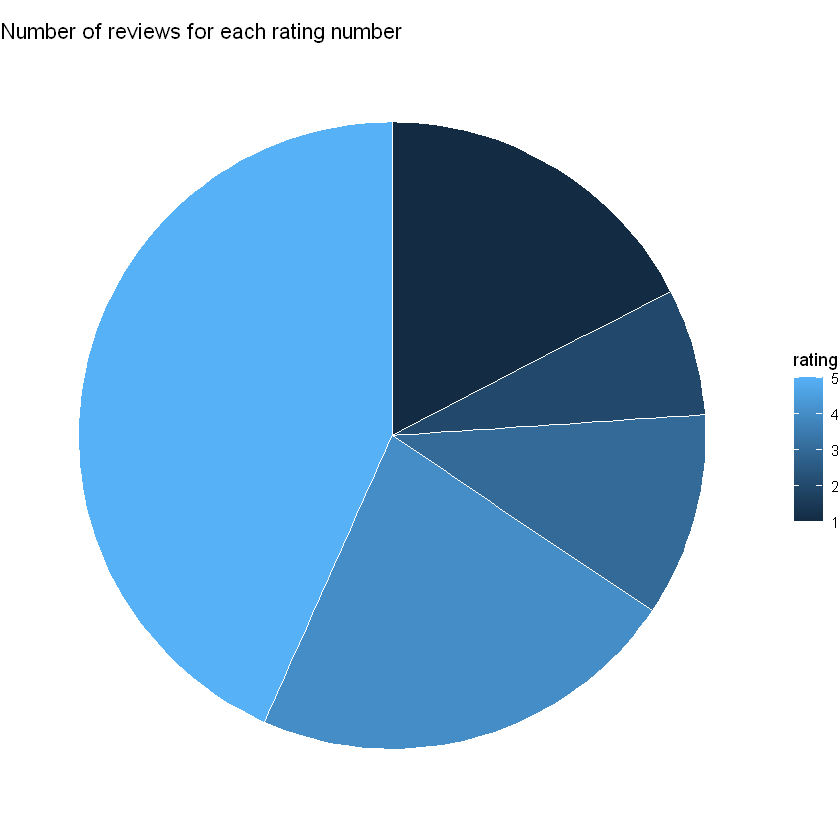

In [5]:
### View the number of reviews from each rating

rating = c(1,2,3,4,5)  # Amazon uses a 5 star rating system
ratingnum = c()

for (i in rating) {
    # Loop through rating values and add number of reviews for that value to ratingnum
    ratingnum = c(ratingnum, length(df_data[df_data$ReviewStar == i, 3]) )
    
    # Print the number
    cat('Number of', i, 'star reviews:', ratingnum[i], '\n')
}

# Convert to a dataframe
ratingdata = data.frame(rating = rating, ratingnum = ratingnum)

# Plot in a bar chart
ggplot(ratingdata, aes(x = '', y = ratingnum, fill = rating, color = rating)) +
  geom_bar(stat = 'identity', color = 'white') +
  coord_polar('y') +
  theme_void() +
  ggtitle('Number of reviews for each rating number')

In [6]:
# Combined: Column that combines the ReviewTitle and ReviewBody contents
df_data$Combined = paste(df_data[[1]], df_data[[2]])

## Binning the reviews into categories and merging title/body text

The number of 5 star reviews is larger than the number of 1, 2, and 3 star reviews combined - the number of 2 star reviews doesn't even break 1000. The data is thus skewed, and if machine learning algorithms are run with the current 5 categories, it would likely be innaccurate.

From a business's perspective, though, customer satisfaction is key - any rating lower than perfect can be considered bad. If the customer left a low rating, they were unsatisfied with something, and discovering these issues is important for guiding product development.

I will create two class bins - "good" reviews consisting of 4/5 star reviews, and "bad" reviews consisting of all others (1-3 star reviews). This is technically still skewed toward the good review category, but this is a fairly accurate representation of sentiment - a 4 star rating or better would typically be considered good on a 5 star spectrum.

I will also merge the title with the body into a single text block - this is because the title acts as a summarized version of the review where the most important criticism is noted.

In [7]:
### For the SVM analysis, it will be easier to work with 0 (bad review) and 1 (good review)

# Make a copy of the original DF to avoid any errors
df_data2 = df_data

# good review = rating >=4
# bad review = rating < 4
cutoff = 4

### Changing labels for the SVM analysis
df_data2[ df_data2$ReviewStar < cutoff, 'class'] = 'bad'
df_data2[ df_data2$ReviewStar >= cutoff, 'class'] = 'good'

head(df_data2, 3)

ReviewTitle,ReviewBody,ReviewStar,Product,Combined,class
Honest review of an edm music lover,No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.,3,boAt Rockerz 255,Honest review of an edm music lover No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.,bad
Unreliable earphones with high cost,"This earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.",1,boAt Rockerz 255,"Unreliable earphones with high cost This earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.",bad
Really good and durable.,"i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.",4,boAt Rockerz 255,"Really good and durable. i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.",good


Number of good reviews:  9402 
Number of bad reviews:  4935 


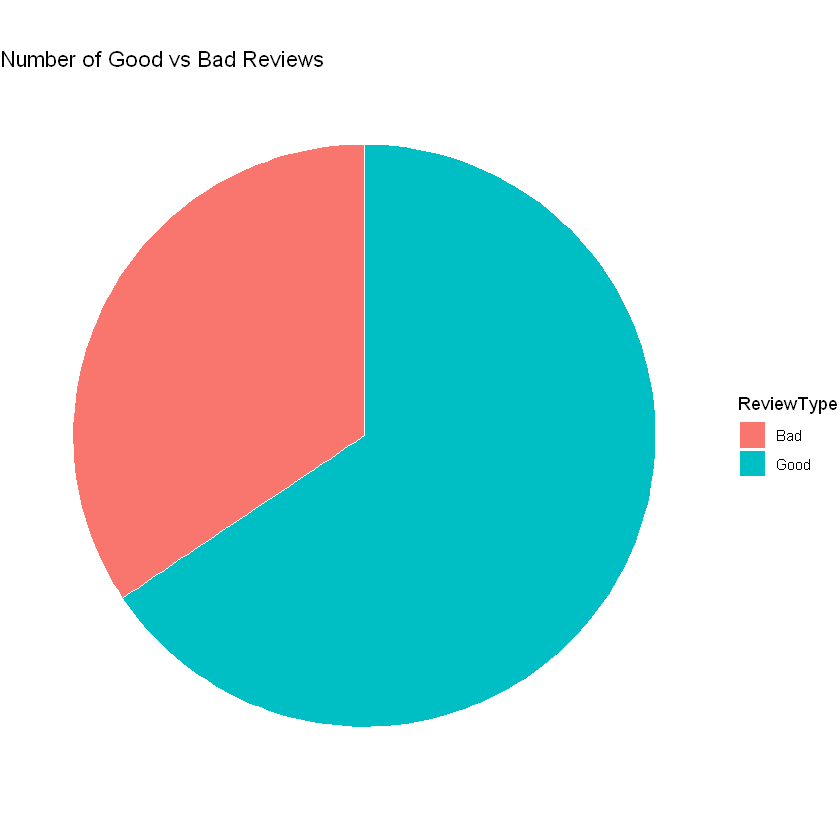

In [8]:
### Split data into good and bad reviews

df_good = df_data2[ df_data2$class == 'good', 'Combined']
df_bad = df_data2[ df_data2$class == 'bad', 'Combined']

cat('Number of good reviews: ', length(df_good), '\n')
cat('Number of bad reviews: ', length(df_bad), '\n')

pie_data = data.frame(num = c(length(df_good), length(df_bad)), ReviewType = c('Good', 'Bad'))

ggplot(pie_data, aes(x = '', y = num, fill = ReviewType )) +
  geom_bar(stat = 'identity', color = 'white') +
  coord_polar('y') +
  theme_void() +
  ggtitle('Number of Good vs Bad Reviews')

In [9]:
for (i in c(1:5)) {
    print(df_good[i])
}

[1] "Really good and durable.\n i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.\n"
[1] "Just Awesome Wireless Headphone under 1000...<U+0001F609>\n Its Awesome... Good sound quality & 8-9 hrs battery life... Just waww look... <U+0001F609> I brought just 999 rupees...But Amazon's Packageing system is Very bad... Very poor packaging... Flipcart's packaging system is much better than Amazon...\n"
[1] "Loved the color and sound !!\n Sound-4.5/5Build quality-4.5/5Battery life -4/5Earphones quality is good with strong magnetic lock... Straps is good quality and th

In [10]:
for (i in c(1:6)) {
    print(df_bad[i])
}

[1] "Honest review of an edm music lover\n No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.\n"
[1] "Unreliable earphones with high cost\n This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying<U+200B> this unreliable product.Thanks.\n"
[1] "stopped working in just 14 days\n Its sound quality is adorable. overall it was go

## Useful functions for building the corpus

In [11]:
################################ Create a function that will perform preprocessing required for building the corpus

build_corpus = function(vec, myStopWords) {
  ### Build a preprocessing function to build a word corpus
  ### Input: A vector containing all documents, a vector containing stopwords
  ### Output: A word corpus with all preprocessing steps completed
  # Tasks:
  # Create the corpus
  # Strip most/all punctuation
  # Split corpus into individual words and save to own variable
  # Convert to all lowercase
  # Delete all stop words - find an existing list and add anything
  # Stem
  ### Check the stems
  # Set min/max limits
  # Delete numbers (can be ratings, price, product number, date; probably not useful)
  
  ### Create the corpus
  vec_corp = VCorpus(VectorSource(vec))
    
  ### Convert to ASCII
  ### This is a temporary fix to remove emojis
  vec_corp = tm_map(vec_corp, content_transformer(iconv), to='ASCII', sub='')
  
  # Remove general punctuation
  # Replace ',' '.' '/' with spaces first to avoid accidental word merges (ex: good.You --> goodYou)
  vec_corp = tm_map(vec_corp, content_transformer(gsub), pattern = ',', replacement = ' ')
  vec_corp = tm_map(vec_corp, content_transformer(gsub), pattern = '\\.', replacement = ' ')
  vec_corp = tm_map(vec_corp, content_transformer(gsub), pattern = '\\/', replacement = ' ')
  vec_corp = tm_map(vec_corp, removePunctuation)
  
  ### Remove numbers
  vec_corp = tm_map(vec_corp, removeNumbers)
  
  ### Convert to lower case
  vec_corp = tm_map(vec_corp, content_transformer(tolower))
  
  ### Remove stopwords
  vec_corp = tm_map(vec_corp, removeWords, tolower(myStopWords))
  
  ### Perform stemming
  vec_corp = tm_map(vec_corp, stemDocument)
  
  ### Eliminate extra whitespaces
  vec_corp = tm_map(vec_corp, stripWhitespace)
  
  return(vec_corp)
}

######################################## Create a function that will build the corpus

build_dtm = function(vec, 
                     stopWords, 
                     controls = list(weighting = weightTf, 
                                     bounds = list(global = c(50, Inf)), 
                                     wordLengths = c(3, 15),
                                     normalize = FALSE),
                     sparse_threshold = -1) {
    ### Build a preprocessing function to build a word corpus
    ### Input: A vector containing all documents, a vector containing stopwords
    ### Output: A word corpus with all preprocessing steps completed
    
    temp_corp = build_corpus(vec, stopWords)
    temp_corp = DocumentTermMatrix(temp_corp, control = controls)
    if (sparse_threshold > 0) {
        temp_corp = removeSparseTerms(temp_corp, sparse_threshold)
    }
    
    
    return(temp_corp)
}

In [12]:
# Create a list of stopwords to delete

# Delete product names (derived from the original data)
products = c(unique(df_data$Product), tolower(unique(df_data$Product)))

# Add any custom terms that may appear often in reviews
#custom = c('u', 'ur', 'headphone', 'headphones', 'earphone', 'earphones')

# Words pertaining to quality
# quality = c('good', 'nice', 'best', 'bad', 'worst', 'excellent', 'great', 'superb', 'superior', 'super', 'worth', 'ok', 
#            'better', 'fine', 'perfect', 'cheap', 'awful', 'poor', 'not good', 'worse', 'substandard', 'adequate', 
#            'inadequate', 'terrible', 'satisfactory', 'unsatistfactory', 'unacceptable', 'inferior', 'awesome', 'like',
#            'love', 'hate', '')

# Create the stopwords list
myStopWords = c(stopwords('en'), products)
# Exceptions from the stopwords list
myStopWords = myStopWords[(myStopWords != 'not') & (myStopWords != 'no')]

## Build a corpus containing all reviews
This will help us to visualize various aspects of the data. I mainly will build bar chart and a wordcloud to visualize the most common words in all reviews

In [13]:
controls = list(weighting = weightTf, 
                bounds = list(global = c(10, Inf)), 
                wordLengths = c(3, 15), 
                normalize = TRUE)
sparse_threshold = .95

# Build corpus containing all reviews - function is not used to see the changes over time
# Remove words relating to quality as well
review_corp_all = build_corpus(df_data$Combined, c(myStopWords))

# Convert the corpus to a document-term matrix (DTM) for further processing
test_noBounds = DocumentTermMatrix(review_corp_all, control = list(weighting = weightTf, normalize = TRUE))
all_dtm = DocumentTermMatrix(review_corp_all, control = controls)

# Remove sparse terms
all_dtm2 = removeSparseTerms(all_dtm, sparse_threshold)
#all_dtm2 = data.frame(as.matrix(all_dtm))#removeSparseTerms(all_dtm, sparse_threshold)



In [14]:
# Compare the first review before preprocessing, as stored in the corpus, and as stored in the DTM
i = 1481

cat('Original text from review 1481:\n\n')
cat(df_data$Combined[i], '\n\n')

cat('Pre-processed text from review 1481 in the corpus:\n\n')
inspect(review_corp_all[[i]])

cat('\n\nPre-processed text from review 1481 in the DTM:\n\n')
inspect(all_dtm[i,])

cat('\n\nAfter removing sparse terms\n\n')
inspect(all_dtm2[i,])

cat('\n\nTEST: No bounds and no removing sparse terms')
inspect(test_noBounds[i,])

Original text from review 1481:

Good headphone at affordable cost
 I liked the product. Very good sound quality. Call quality is also excellent. Totally satisfied.
 

Pre-processed text from review 1481 in the corpus:

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 95

good headphon afford cost like product good sound qualiti call qualiti also excel total satisfi


Pre-processed text from review 1481 in the DTM:

<<DocumentTermMatrix (documents: 1, terms: 1270)>>
Non-/sparse entries: 13/1257
Sparsity           : 99%
Maximal term length: 12
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   afford also call cost excel good headphon like product qualiti
  1481      1    1    1    1     1    2        1    1       1       2


After removing sparse terms

<<DocumentTermMatrix (documents: 1, terms: 44)>>
Non-/sparse entries: 9/35
Sparsity           : 80%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs  

In [15]:
# Convert to temporary data frame for visualization preprocessing
all_dtm_temp = data.frame(as.matrix(all_dtm2)) # DF where each column has the TFIDF of each term for each document

# Get term counts
all_dtm_df = data.frame(terms = names(colSums(all_dtm_temp)), count = colSums(all_dtm_temp))

### Visualizing some of the most important terms in all reviews

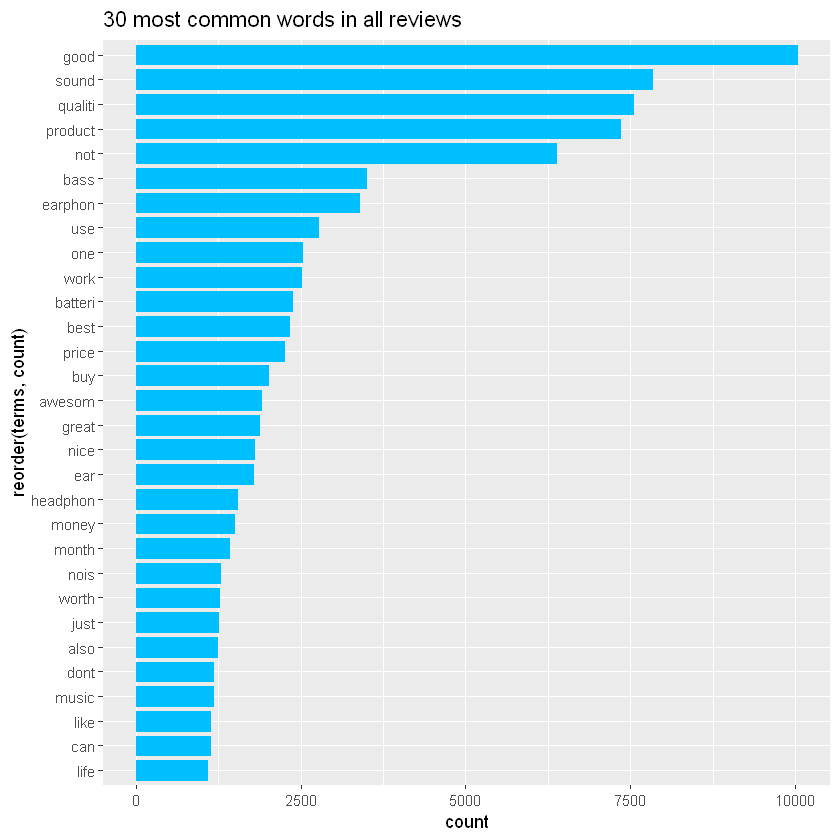

In [16]:
# Plot the 30 most important words
ggplot( data = head(all_dtm_df[order(-all_dtm_df$count),], 30), aes(reorder(terms, count), count)) +
    geom_col(color = 'deepskyblue', fill = 'deepskyblue' , width = .8) +
    labs(title = '30 most common words in all reviews') +
    coord_flip() #+
    #theme(axis.text.x = element_text(angle = 45))


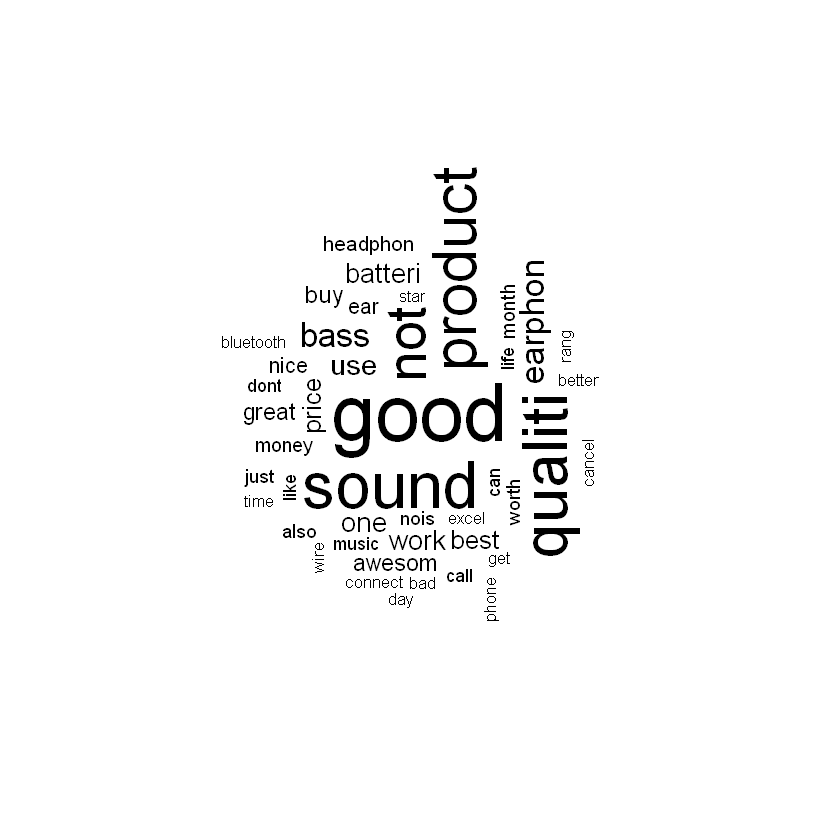

In [31]:
set.seed(100)
cloud_dat = all_dtm_df[order(-all_dtm_df$count),]

# View the data in a wordcloud
wordcloud(words = cloud_dat$terms,
          freq = cloud_dat$count,
          #scale = c(4, .5),
          #min.freq = 0,
          max.words = 200,
          random.order = FALSE,
          rot.per = .35)


### Conclusions for the overall review DTM

Without most words referring to preference/sentiment (removed in the stopwords step), a few words regarding headphone quality appear to be the most discussed across all reviews. Some conclusions can be made, but for a more accurate analysis, the context of these words would need to be considered:

**Most important word:**
* product: Most likely referring to the product being reviewed, but could indicate other products being compared

**Various terms indicate focus on build quality:**
* qualiti/comfort
* batteri/life/charg
* work/problem
* bluetooth/connect

**Various terms indicate focus on sound quality:**
* sound/clariti
* bass/trebl
* audio
* volum

**Various terms indicate focus on product features:**
* bluetooth
* headset
* mic
* wire/wireless/call

**Various terms indicate focus on customer experience:**
* servic/experi
* averag
* recommend/decent/durabl
* cancel/replac/warranti: Most likely these customers are looking to refund or replace their headphones
* amaz: Most likely referring to Amazon, this may refer to the buying/shipping experience

**Various terms indicate focus on price and product value:**
* price/bought/buy
* valu/money
* warranti

## Building a corpus for good and bad reviews

In [34]:
# Build the corpus
controls = list(weighting = weightTf, 
                bounds = list(global = c(1, Inf)), 
                wordLengths = c(3, 15), 
                normalize = FALSE)
sparse_threshold = .98

#temp: DTM format
#df: TF counts
good_dtm = data.frame(as.matrix(build_dtm(df_good, myStopWords, controls, sparse_threshold)))
good_tf = data.frame(terms = names(colSums(good_dtm)), count = colSums(good_dtm))

bad_dtm = data.frame(as.matrix(build_dtm(df_bad, myStopWords, controls, sparse_threshold)))
bad_tf = data.frame(terms = names(colSums(bad_dtm)), count = colSums(bad_dtm))

Number of words in the good reviews:  115

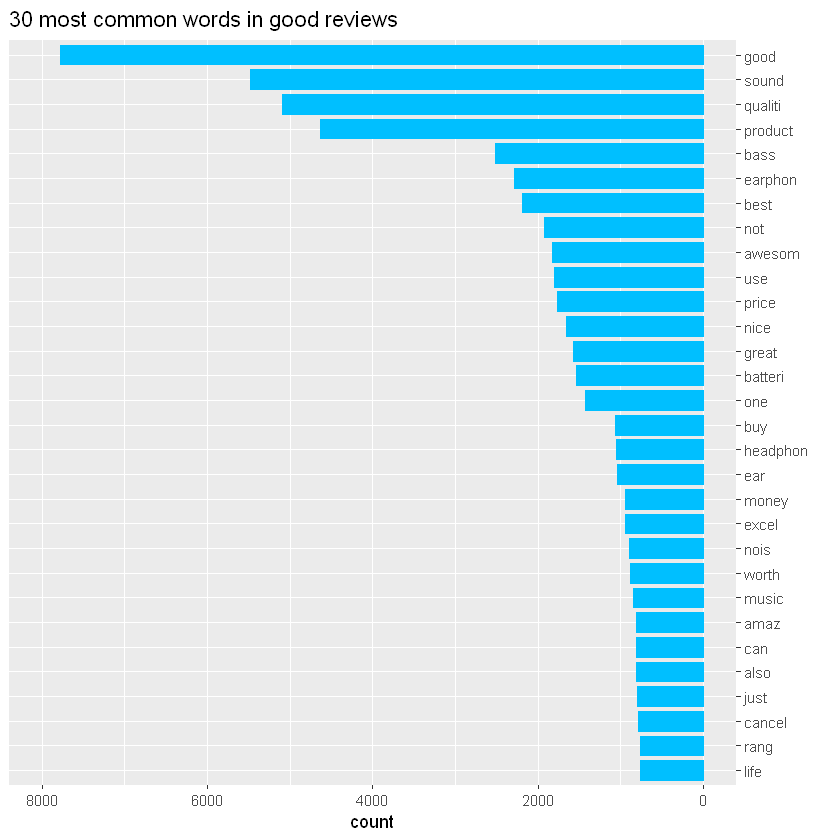

In [35]:
# View the most common words in the good reviews
cat('Number of words in the good reviews: ', nrow(good_tf))

ggplot( data = head(good_tf[order(-good_tf$count),], 30), aes(reorder(terms, count), count)) +
    geom_col(color = 'deepskyblue', fill = 'deepskyblue' , width = .8) +
    labs(title = '30 most common words in good reviews') +
    coord_flip() +
    scale_x_discrete(name = "", position = "top") +
    scale_y_reverse(limits = c(8000, 0), position = "left")


Number of words in the bad reviews:  142

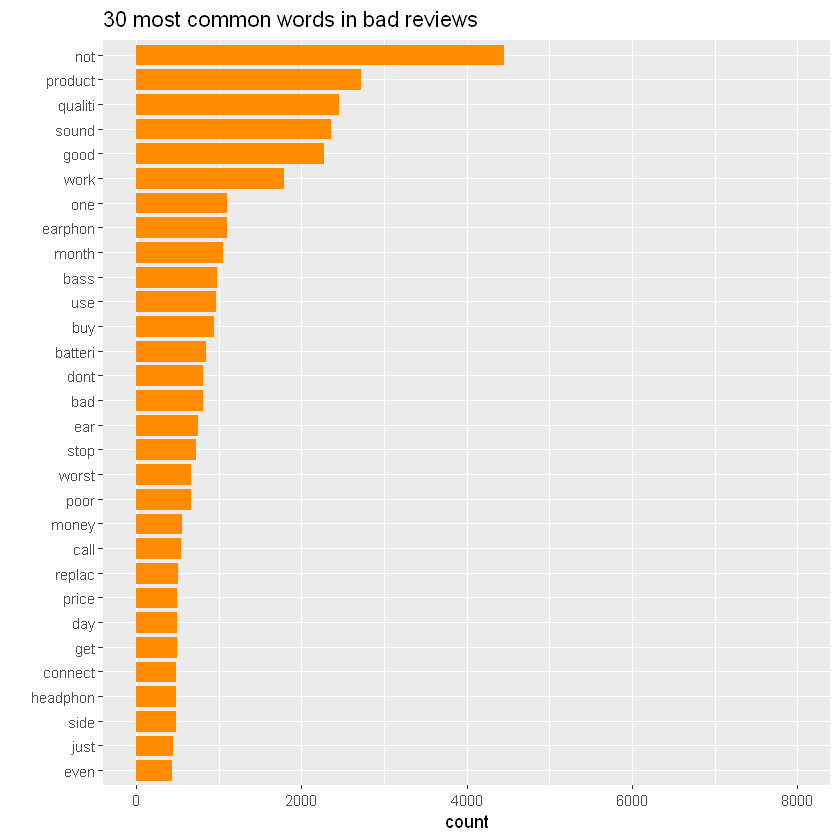

In [36]:
# View the most common words in the good reviews
cat('Number of words in the bad reviews: ', nrow(bad_tf))

ggplot( data = head(bad_tf[order(-bad_tf$count),], 30), aes(reorder(terms, count), count)) +
    geom_col(color = 'darkorange', fill = 'darkorange' , width = .8) +
    labs(title = '30 most common words in bad reviews') +
    scale_x_discrete(name = "") + 
    ylim(0, 8000) + 
    coord_flip()

###  Conclusions from the initial analysis of good/bad reviews

The most notable finding is that the top four terms in the good review set are the 2nd-5th terms in the bad review set (excluding the top term, "not"). "Good" ranks very highly on the bad review set, which is fairly counterintuitive. My theory is that since only individual tokens are used (instead of using n-grams), some of these terms are taken out of context - good may actually be "not good". Another theory is that because these reviews are on a scale from 1-5, the content of the review may be both positive and negative, especially in the middle of the scale. This leads to many terms being shared between the sets.

Another interesting conclusion is how there are more important words in the bad review set than there are in the good review set (138 vs 114). Considering how the bad review set included only 34.4% of the total reviews, I would have expected fewer words in the bad review DTM.

One possible explanation is that people tend to be more comprehensive when leaving bad reviews
* Many good reviews focus on customer sentiment

>'Just go for it\n **Awesome best budget** wireless earphones\n'

>'**SUPERB**\n **Sound quality is good**. noise cancellation is not upto the mark. **battery quality is decent**. by charging it once you can enjoy upto 5hrs of music without any issue\n'
* Bad reviews are often more detailed to emphasize discontent

>'Honest review of an edm music lover\n No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following **dissapointed** me though i tried a lot to adjust.1.**Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic**. Other person keeps complaining about my voice.\n'

>'Review update - **Product failed after a few months**\n Update: Sadly this is the **second Boat product to conk off after few months of use**. I guess this is the end of the journey for you and I Boat Audio, **not buying any more products from your brand**. Changed the rating to reflect the same.I was in the market for a cheap pair of Bluetooth earphones and I chanced upon this on a lightning deal and bought it. I have used Boat products before, they have good build quality and their sound is alright. I’m writing this after a month or so, enough time to have lived with it and get to know quirks and other problems.• **The sound is nothing great**, it’s a bit on the bassy side. If you’re a bass lover, this is definitely a good buy.• Connectivity is quick and painless – and it works without hassle every time. **The quality of the connectivity depends and is sometimes weird**. I can put the phone on charge and use it for a distance of about 3 meters, no worries. But sometimes when I’m walking really fast or jogging there are breaks and crackles in audio. Not sure if it’s the material of my gym wear, but it works well when the phone’s in my jeans.• **Battery life is nothing to write home about** – I listen to music constantly even when I’m at work. My demands are probably too high for this price range.• It is sweat-proof as advertised. No interruptions under a light drizzle.• It’s got great build quality for the price – looks and feels premium. Doesn’t tangle at all.• It stays in your ear regardless of the intensity of the exercise which is great.On the whole a great buy if you are looking for a cheaper alternative. Wait for a sale before you get it though.Like my reviews? Please do click the helpful button. It encourages me to share more about the products I use. Thanks!\n'
        

### Adjusting the weights according to importance in good/bad reviews

To lessen the influence of shared terms, I decided to implement a custom scheme that mirrors term frequency - inverse document frequency (TF-IDF). TF-IDF is a combination of two separate methods. Term frequency is just the frequency that a term occurs in a document (if normalized, then it is also divided by the number of terms in the document). Inverse document frequency measures the importance of a term by taking the natural log of the total number of documents divided by the number of documents with a given term in it.

TFIDF = Num occurences of a term in a document * ln( {Total num documents} / {Num documents containing the term} )

$$Weight_{new} = Weight * \frac{Weight}{Total}$$

For my variation, first, I will build a separate DTM for both the good and bad review sets (gDTM, bDTM). I will then calculate the term frequencies for every term that appears in either set (g_TF, b_TF), as well as the inverse document frequency within either set (g_idf, b_idf). I will then extract all terms that are shared between the two review sets (inboth_df).

Then, for every term contained within inboth_df, I will multiply the TF from both sets with the IDF from the opposite set. Any term that is not contained within inboth_df will be multiplied by the default IDF (where number of documents containing the term = 1, to avoid division by 0)

$$idf\_count_{good\_reviews} = Good\_TF * Bad\_IDF$$
$$idf\_count_{bad\_reviews} = Bad\_TF * Good\_IDF$$

Taking "good" for example:

|Term  |Good TF     |Bad  TF     |TF Total     |Good IDF    |Bad  IDF    |
|:----:|----:       |----:       |----:        |----:       |----:       |
|good  |7869        |2273        |10142        |0.6551626   |1.142097    |

Given these, values the custom TF-IDF (idf_count) values will be:

$$idf\_count_{good\_reviews} = 7869 * 0.6551626 = 8989.449$$
$$idf\_count_{bad\_reviews} = 2273 * 0.6551626 = 1489.185$$

Taking "stop" for example (which is not represented in the good review set)

|Term  |Bad  TF     |TF Total     |Good IDF    |
|:----:|----:       |----:        |----:       |
|stop  |713         |713          |N/A         |

Since "stop" is not in the good review set, I will take the default good IDF value:

$$Default\_Good\_IDF = \ln{\dfrac{\# Good Reviews}{1}} = \ln{\dfrac{9402}{1}} = 9.1486777$$

$$idf\_count_{bad\_reviews} = 713 * 5.370638 = 6523.007$$


For reference, these are the calculated default IDF values

|Default Good IDF |Default Bad IDF |
|----:            |----:           |
|9.1486777        |8.5041080             |



## Qualities of a good indicator

* High overall TF in DTM1 (count)
* High overall DF in DTM1 (colSums(dtm1))
* Low overall TF in DTM2 (tf2_count)
* Low overall DF in DTM2 (colSums(dtm2))

In [47]:
# Creating a function that will implement the weighting scheme

col_scaler = function(vec, col_scale = c(1, 100)) {
    # scale a vector between max and min
    
    max_val = col_scale[2]
    min_val = col_scale[1]
    scaled_vec = ( min_val + (max_val - min_val) * ((vec - min(vec)) / (max(vec) - min(vec))) )
    
    return(scaled_vec)
    
    }
    

custom_tfdf = function(dtm1, dtm2, class_col = '', output_scale = c(1, 100), diff_weight = 1, normByDocLength = FALSE) {
    # Implements custom tfdf where terms are weighted according to term frequency and doc frequency
    
    # Get dfs/tfs for each df and insert into tf
    # Initialize defaults for non-shared terms
    if (class_col != '') {
        dtm1_class_col = dtm1[class_col]
        dtm2_class_col = dtm2[class_col]
        dtm1 = subset(dtm1, select = -c(class_col))
        dtm2 = subset(dtm2, select = -c(class_col))
        }
    
    if (normByDocLength == TRUE) {
        dtm1 = sweep(dtm1, MARGIN = 1, STATS = rowSums(dtm1) + 1, FUN = '/')
        dtm2 = sweep(dtm2, MARGIN = 1, STATS = rowSums(dtm2) + 1, FUN = '/')
        }

    tf1 = data.frame(terms = names(dtm1), 
                     avg_count = colMeans(dtm1), 
                     tot_count = colSums(dtm1),
                     doc_freq = colSums(dtm1 != 0),
                     tf1_higherFreq = 1,
                     tf2_avg_count = 1,
                     tf2_tot_count = 1,
                     tf2_doc_freq = 1,
                     stringsAsFactors = FALSE)
    tf2 = data.frame(terms = names(dtm2), 
                     avg_count = colMeans(dtm2), 
                     tot_count = colSums(dtm2),
                     doc_freq = colSums(dtm2 != 0),
                     tf2_higherFreq = 1,
                     tf1_avg_count = 1,
                     tf1_tot_count = 1,
                     tf1_doc_freq = 1,
                     stringsAsFactors = FALSE)
    union_tf = data.frame(terms = union(tf1$terms, tf2$terms), 
                          tf1_avg_count = 1, 
                          tf1_tot_count = 1,
                          tf1_doc_freq = 1,
                          tf2_avg_count = 1,
                          tf2_tot_count = 1,
                          tf2_doc_freq = 1,
                          stringsAsFactors = FALSE)


    # Find shared terms
    in_both = intersect(tf1$terms, tf2$terms)
    # Get doc freqs and counts for shared terms
    tf1_doc_freq = tf1[tf1$terms %in% in_both, 'doc_freq']
    tf1_avg_count = tf1[tf1$terms %in% in_both, 'avg_count']
    tf1_tot_count = tf1[tf1$terms %in% in_both, 'tot_count']
    tf2_doc_freq = tf2[tf2$terms %in% in_both, 'doc_freq']
    tf2_avg_count = tf2[tf2$terms %in% in_both, 'avg_count']
    tf2_tot_count = tf2[tf2$terms %in% in_both, 'tot_count']
    # Update union_tf with shared values
    union_tf[union_tf$terms %in% intersect(union_tf$terms, tf1$terms), c('tf1_avg_count', 'tf1_tot_count', 'tf1_doc_freq')] = list(tf1$avg_count, tf1$tot_count, tf1$doc_freq)
    union_tf[union_tf$terms %in% intersect(union_tf$terms, tf2$terms), c('tf2_avg_count', 'tf2_tot_count', 'tf2_doc_freq')] = list(tf2$avg_count, tf2$tot_count, tf2$doc_freq)
    tf1_higherFreq_cond = union_tf$tf1_avg_count * union_tf$tf1_tot_count * union_tf$tf1_doc_freq > nrow(dtm1) * union_tf$tf2_avg_count * union_tf$tf2_tot_count * union_tf$tf2_doc_freq
    tf2_higherFreq_cond = union_tf$tf2_avg_count * union_tf$tf2_tot_count * union_tf$tf2_doc_freq > nrow(dtm2) * union_tf$tf1_avg_count * union_tf$tf1_tot_count * union_tf$tf1_doc_freq
    union_tf1_higherFreq = union_tf[tf1_higherFreq_cond, 'terms']
    union_tf2_higherFreq = union_tf[tf2_higherFreq_cond, 'terms']
    # Update tf1 and tf2 with shared values
    tf1[tf1$terms %in% in_both, c('tf1_higherFreq', 'tf2_avg_count', 'tf2_tot_count', 'tf2_doc_freq')] = list(0, tf2_avg_count, tf2_tot_count, tf2_doc_freq) 
    tf1[(tf1$avg_count * tf1$tot_count * tf1$doc_freq > tf1$tf2_avg_count * tf1$tf2_tot_count * tf1$tf2_doc_freq), 'tf1_higherFreq'] = 1
    tf2[tf2$terms %in% in_both, c('tf2_higherFreq', 'tf1_avg_count', 'tf1_tot_count', 'tf1_doc_freq')] = list(0, tf1_avg_count, tf1_tot_count, tf1_doc_freq)
    tf2[(tf2$avg_count * tf2$tot_count * tf2$doc_freq > tf2$tf1_avg_count * tf2$tf1_tot_count * tf2$tf1_doc_freq), 'tf2_higherFreq'] = 1
    # Update the higherFreq columns to be factors
    tf1$tf1_higherFreq = as.factor(tf1$tf1_higherFreq)
    tf2$tf2_higherFreq = as.factor(tf2$tf2_higherFreq)
    
    # Term weighting
    # tf1['weight'] = (tf1$doc_freq / nrow(dtm1)) / (tf1$tf2_avg_count * tf1$tf2_doc_freq + 1) * (tf1$tot_count / nrow(dtm1))
    # tf2['weight'] = (tf2$doc_freq / nrow(dtm2)) / (tf2$tf1_avg_count * tf2$tf1_doc_freq + 1) * (tf2$tot_count / nrow(dtm2))
    tf1['weight'] = (tf1$doc_freq * tf1$tot_count * tf1$avg_count) / (nrow(dtm1) * tf1$tf2_tot_count * tf1$tf2_avg_count * tf1$tf2_doc_freq)
    tf2['weight'] = (tf2$doc_freq * tf2$tot_count * tf2$avg_count) / (nrow(dtm2) * tf2$tf1_tot_count * tf2$tf1_avg_count * tf2$tf1_doc_freq)
    tf1[setdiff(tf1$terms, in_both), 'weight'] = tf1[setdiff(tf1$terms, in_both), 'weight'] * diff_weight 
    tf2[setdiff(tf2$terms, in_both), 'weight'] = tf2[setdiff(tf2$terms, in_both), 'weight'] * diff_weight 
    if (normByDocLength == TRUE) {
        tf1['weighted_count'] = tf1$tot_count * tf1$weight
        tf2['weighted_count'] = tf2$tot_count * tf2$weight
    } else {
        tf1['weighted_count'] = tf1$avg_count * tf1$weight
        tf2['weighted_count'] = tf2$avg_count * tf2$weight
    }
    tf1map = log(tf1$weighted_count) 
    tf2map = log(tf2$weighted_count)
    tf1['weighted_count_scaled'] = col_scaler(tf1map, col_scale = output_scale)
    tf2['weighted_count_scaled'] = col_scaler(tf2map, col_scale = output_scale)
         
    # Multiply dtm columns by weights
    dtm1 = sweep(dtm1, MARGIN = 2, STATS = tf1$weight, FUN = '*')
    dtm2 = sweep(dtm2, MARGIN = 2, STATS = tf2$weight, FUN = '*')
    
    # Add the columns missing from either dtm with zero values (for row-binding later)
    set1terms = c(setdiff(tf1$terms, tf2$terms))
    set2terms = c(setdiff(tf2$terms, tf1$terms))
    
    dtm1_addCol = data.frame(matrix(0, nrow = nrow(dtm1), ncol = length(set2terms)))
    colnames(dtm1_addCol) = set2terms
    dtm1 = cbind(dtm1_addCol, dtm1)

    dtm2_addCol = data.frame(matrix(0, nrow = nrow(dtm2), ncol = length(set1terms)))
    colnames(dtm2_addCol) = set1terms
    dtm2 = cbind(dtm2_addCol, dtm2)
    
    if (class_col != '') {
        dtm1 = cbind(dtm1, dtm1_class_col)
        dtm2 = cbind(dtm2, dtm2_class_col)
        }

    return(list(tf1, tf2, union_tf, dtm1, dtm2))
}


In [48]:
# Build the corpus
controls = list(weighting = weightTf, 
                bounds = list(global = c(10, Inf)), 
                wordLengths = c(3, 15), 
                normalize = FALSE)

#temp: DTM format
#df: TF counts
# Don't delete sparse terms in the beginning - delete after custom_tfidf
print('starting good_dtm')
good_dtm = data.frame(as.matrix(build_dtm(df_good, myStopWords, controls)))
print('done')
print('starting bad_dtm')
bad_dtm = data.frame(as.matrix(build_dtm(df_bad, myStopWords, controls)))
print('done')

[1] "starting good_dtm"
[1] "done"
[1] "starting bad_dtm"
[1] "done"


In [49]:
doc_freq_threshold = 50
diff_weight = 1
output_scale = c(0,1)

print('starting custom')
output = custom_tfdf(good_dtm, bad_dtm, output_scale = output_scale, diff_weight = diff_weight, normByDocLength = FALSE)
print('done')

good_tf = output[[1]][(output[[1]]$doc_freq >= doc_freq_threshold), ]
bad_tf = output[[2]][(output[[2]]$doc_freq >= doc_freq_threshold), ]
union_tf = output[[3]][output[[3]]$terms %in% union(good_tf$terms, bad_tf$terms), ]
good_dtm2 = output[[4]][ ,intersect(colnames(output[[4]]), good_tf$terms)]
bad_dtm2 = output[[5]][ ,intersect(colnames(output[[5]]), bad_tf$terms)]


cat('Good Review DTM\nNumber of words in the DTM: ', length(good_tf$terms), '\n')
cat('Number of words unique to the good DTM: ', 
    length(setdiff(good_tf$terms, bad_tf$terms)), '\n\n')
cat('Top words in the good review DTM by tfdf count')
head(good_tf[order(-good_tf$weighted_count),], 10)

cat('Bad Review DTM\nNumber of words in the DTM: ', length(bad_tf$terms), '\n')
cat('Number of words unique to the bad DTM: ', 
    length(setdiff(bad_tf$terms, good_tf$terms)), '\n\n')
cat('Top words in the bad review DTM by tfdf count')
head(bad_tf[order(-bad_tf$weighted_count),], 10)

cat('Number of rows in final good DTM: ', nrow(good_dtm2), '\n')
cat('Number of columns in final good DTM: ', ncol(good_dtm2), '\n\n')
cat('Number of rows in final bad DTM: ', nrow(bad_dtm2), '\n')
cat('Number of columns in final bad DTM: ', ncol(bad_dtm2), '\n\n')

[1] "starting custom"
[1] "done"
Good Review DTM
Number of words in the DTM:  359 
Number of words unique to the good DTM:  146 

Top words in the good review DTM by tfdf count

,terms,avg_count,tot_count,doc_freq,tf1_higherFreq,tf2_avg_count,tf2_tot_count,tf2_doc_freq,weight,weighted_count,weighted_count_scaled
superb,superb,0.05530738,520,457,1,0.002431611,12,12,3.99232430,0.220805003,1.0000000
awesom,awesom,0.19495852,1833,1457,1,0.014387031,71,58,0.93473059,0.182233691,0.9914686
best,best,0.23356733,2196,1630,1,0.026950355,133,107,0.23185255,0.054153181,0.9375459
excel,excel,0.10082961,948,756,1,0.009321175,46,40,0.44813563,0.045185342,0.9295009
love,love,0.07583493,713,620,1,0.006484296,32,30,0.57279102,0.043437566,0.9277479
five,five,0.03956605,372,371,1,1.000000000,1,1,0.58079022,0.022979575,0.8994543
super,super,0.03201447,301,257,1,0.002634245,13,11,0.69925147,0.022386162,0.8982917
amaz,amaz,0.08657732,814,648,1,0.009929078,49,39,0.25598453,0.022162455,0.8978454
nice,nice,0.17581366,1653,1337,1,0.027355623,135,116,0.09647133,0.016960977,0.8859593
must,must,0.03137630,295,273,1,0.004255319,21,20,0.15037816,0.004718311,0.8291041


Bad Review DTM
Number of words in the DTM:  239 
Number of words unique to the bad DTM:  26 

Top words in the bad review DTM by tfdf count

,terms,avg_count,tot_count,doc_freq,tf2_higherFreq,tf1_avg_count,tf1_tot_count,tf1_doc_freq,weight,weighted_count,weighted_count_scaled
worst,worst,0.13333333,658,466,1,0.003722612,35,30,2.119465215,0.282595362,1.0000000
wast,wast,0.07558257,373,307,1,0.002446288,23,22,1.416849167,0.107089106,0.9592161
stop,stop,0.14407295,711,559,1,0.008721549,82,76,0.213479239,0.030756583,0.9067815
return,return,0.07639311,377,320,1,0.005211657,49,43,0.170066195,0.012991886,0.8705611
poor,poor,0.13191489,651,511,1,0.011699638,110,99,0.069792418,0.009206659,0.8560861
bad,bad,0.16149949,797,614,1,0.016592214,156,133,0.046518972,0.007512790,0.8475406
not,not,0.90050659,4444,2785,1,0.204637311,1924,1468,0.003907357,0.003518600,0.8156591
work,work,0.36028369,1778,1278,1,0.076685812,721,617,0.004862780,0.001751980,0.7863510
month,month,0.21155015,1044,862,1,0.039672410,373,340,0.007667568,0.001622075,0.7831130
pathet,pathet,0.02310030,114,94,1,1.000000000,1,1,0.050160660,0.001158726,0.7689748


Number of rows in final good DTM:  9402 
Number of columns in final good DTM:  359 

Number of rows in final bad DTM:  4935 
Number of columns in final bad DTM:  239 



## Visualizing the updated DTMs

Number of important words in the good reviews:  359 
Number of important words in the bad reviews:  239 


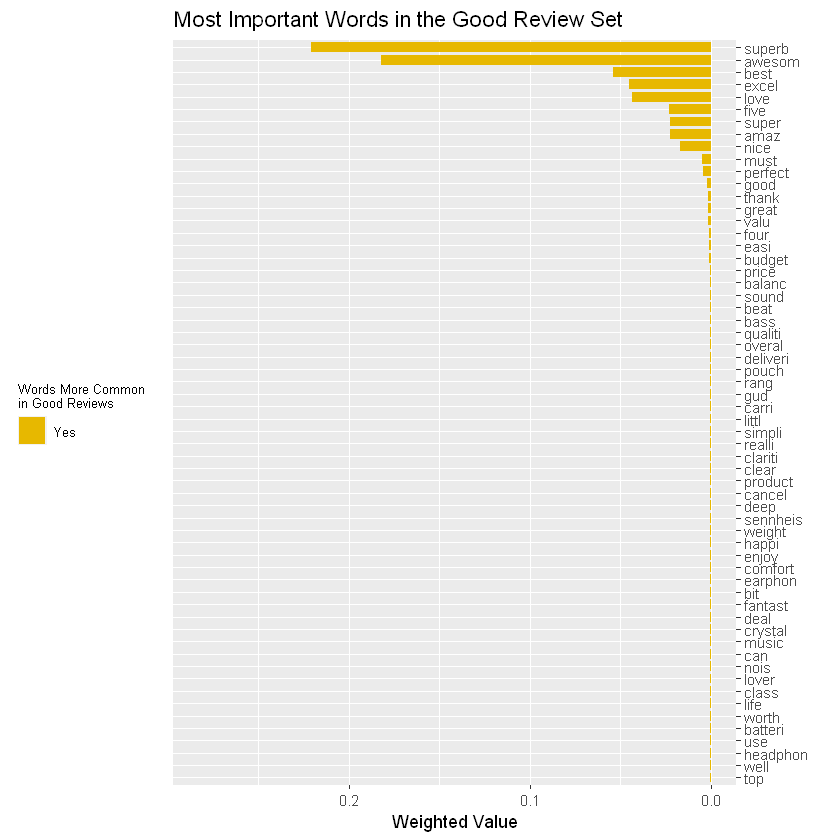

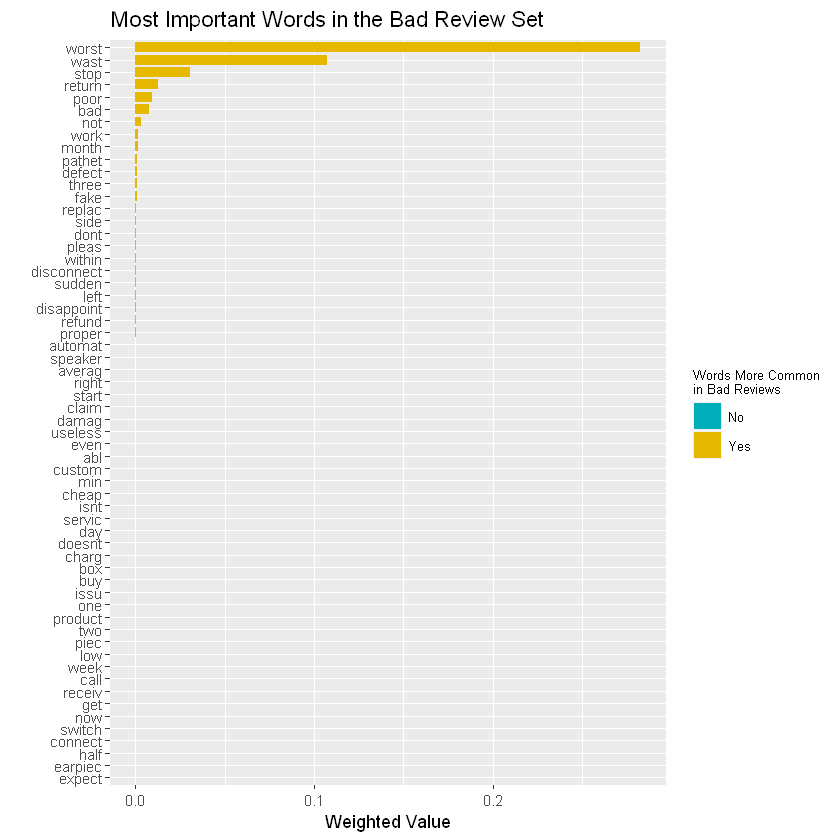

In [50]:
# View the most important words in the good reviews
plot_col = 'weighted_count'
data1 = head(good_tf[order(-good_tf[[plot_col]]),], 60)
data2 = head(bad_tf[order(-bad_tf[[plot_col]]),], 60)
max_val = max(max(data1[[plot_col]]), max(data2[[plot_col]]))
min_val = min(min(data1[[plot_col]]), min(data2[[plot_col]])) - .0001

cat('Number of important words in the good reviews: ', nrow(good_tf), '\n')

ggplot( data = data1, 
            aes(reorder(terms, weighted_count), 
                weighted_count, fill = tf1_higherFreq)
           ) +
        geom_col(width = .8) +
        labs(title = 'Most Important Words in the Good Review Set',
             y = 'Weighted Value',
             fill = 'Words More Common\nin Good Reviews') +
        coord_flip() +
        scale_fill_manual(labels = c('Yes','No'),
                          values = c('#E7B800', '#00AFBB')) +
        scale_x_discrete(name = "", position = "top") +
        scale_y_reverse(limits = c(max_val, min_val)) +
        theme(legend.position = 'left', 
              legend.title = element_text(size = 8),
              legend.text = element_text(size = 8))

# View the most important words in the bad reviews
cat('Number of important words in the bad reviews: ', nrow(bad_tf), '\n')

ggplot( data = data2, 
            aes(reorder(terms, weighted_count), 
                weighted_count, fill = tf2_higherFreq)
           ) +
        geom_col(width = .8) +
        labs(title = 'Most Important Words in the Bad Review Set',
             y = 'Weighted Value',
             fill = 'Words More Common\nin Bad Reviews') +
        coord_flip() +
        scale_fill_manual(labels = c('No', 'Yes'),
                          values = c('#00AFBB', '#E7B800')) +
        scale_x_discrete(name = "", position = "bottom") +
        theme(legend.position = 'right', 
              legend.title = element_text(size = 8),
              legend.text = element_text(size = 8)) +
        ylim(min_val, max_val)




Number of important words in the good reviews:  359 
Number of important words in the bad reviews:  239 


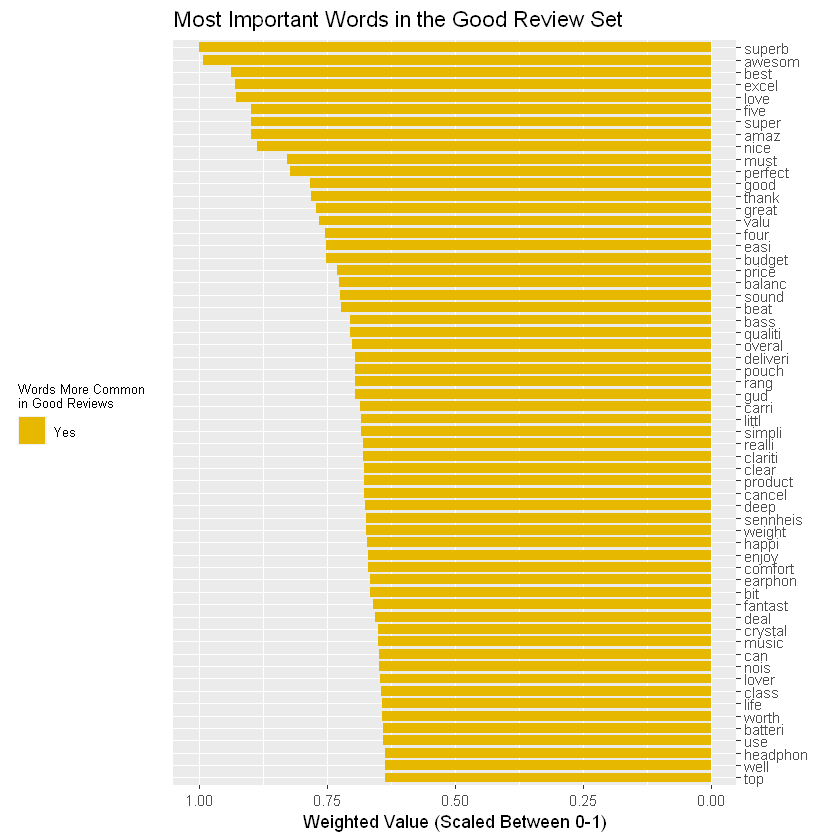

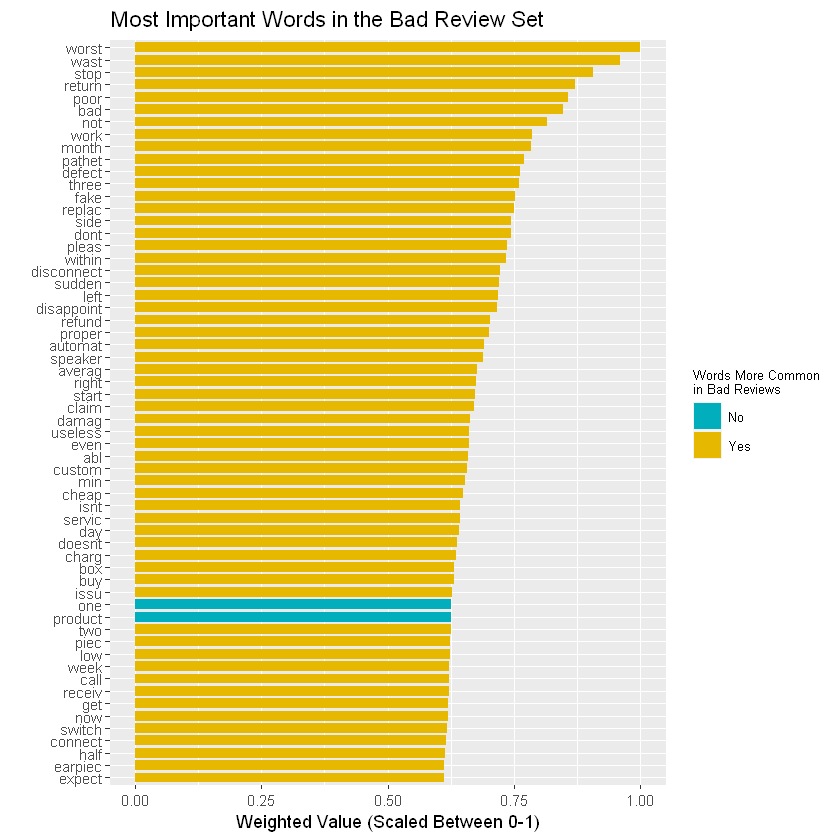

In [53]:
# View the most important words in the good reviews
plot_col = 'weighted_count_scaled'
data1 = head(good_tf[order(-good_tf[[plot_col]]),], 60)
data2 = head(bad_tf[order(-bad_tf[[plot_col]]),], 60)

cat('Number of important words in the good reviews: ', nrow(good_tf), '\n')

ggplot( data = data1, 
            aes(reorder(terms, weighted_count_scaled), 
                weighted_count_scaled, fill = tf1_higherFreq)
           ) +
        geom_col(width = .8) +
        labs(title = 'Most Important Words in the Good Review Set',
             y = 'Weighted Value (Scaled Between 0-1)',
             fill = 'Words More Common\nin Good Reviews') +
        coord_flip() +
        scale_fill_manual(labels = c('Yes','No'),
                          values = c('#E7B800', '#00AFBB')) +
        scale_x_discrete(name = "", position = "top") +
        scale_y_reverse(limits = c(1, 0)) +
        theme(legend.position = 'left', 
              legend.title = element_text(size = 8),
              legend.text = element_text(size = 8))

# View the most important words in the bad reviews
cat('Number of important words in the bad reviews: ', nrow(bad_tf), '\n')

ggplot( data = data2, 
            aes(reorder(terms, weighted_count_scaled), 
                weighted_count_scaled, fill = tf2_higherFreq)
           ) +
        geom_col(width = .8) +
        labs(title = 'Most Important Words in the Bad Review Set',
             y = 'Weighted Value (Scaled Between 0-1)',
             fill = 'Words More Common\nin Bad Reviews') +
        coord_flip() +
        scale_fill_manual(labels = c('No', 'Yes'),
                          values = c('#00AFBB', '#E7B800')) +
        scale_x_discrete(name = "", position = "bottom") +
        theme(legend.position = 'right', 
              legend.title = element_text(size = 8),
              legend.text = element_text(size = 8)) +
        ylim(0,1)


Number of important words in the good reviews:  359 
Number of important words in the bad reviews:  239 


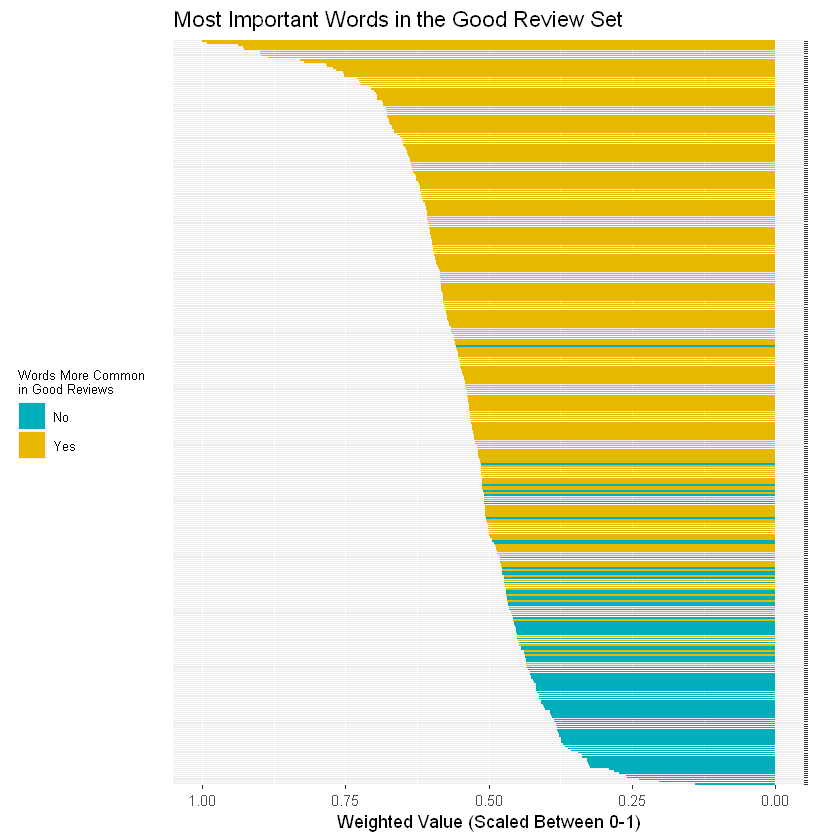

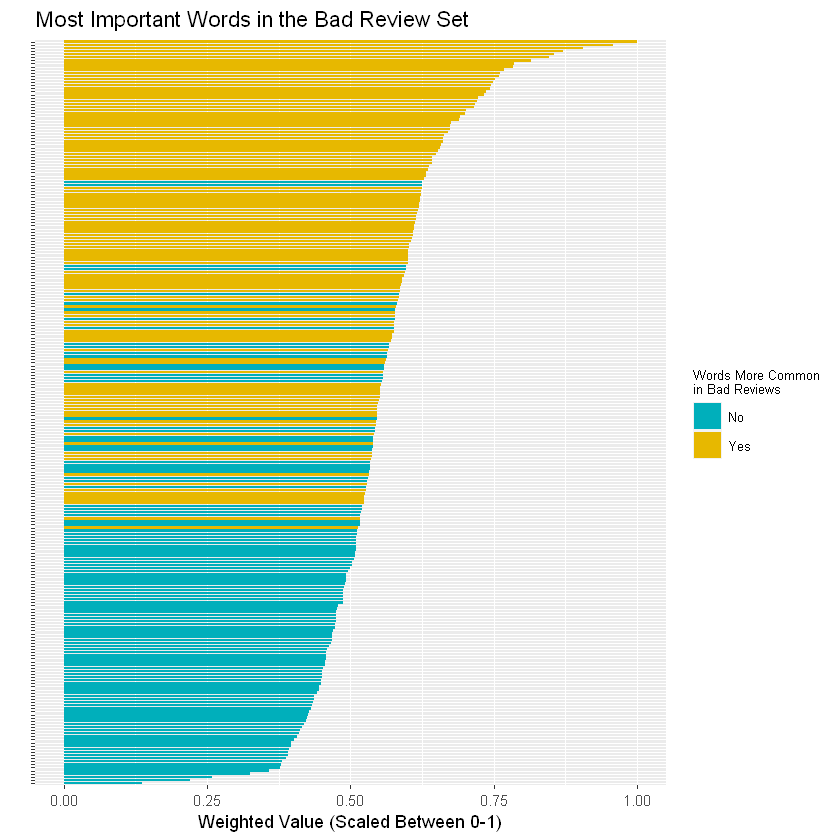

In [52]:
# View the most important words in the good reviews
plot_col = 'weighted_count_scaled'
data1 = good_tf
data2 = bad_tf
max_val = max(max(data1[[plot_col]]), max(data2[[plot_col]])) + .1
min_val = min(min(data1[[plot_col]]), min(data2[[plot_col]])) - .1

cat('Number of important words in the good reviews: ', nrow(good_tf), '\n')

ggplot( data = data1, 
            aes(reorder(terms, weighted_count_scaled), 
                weighted_count_scaled, fill = tf1_higherFreq)
           ) +
        geom_col(width = .8) +
        labs(title = 'Most Important Words in the Good Review Set',
             y = 'Weighted Value (Scaled Between 0-1)',
             fill = 'Words More Common\nin Good Reviews') +
        coord_flip() +
        scale_fill_manual(labels = c('No', 'Yes'),
                          values = c('#00AFBB', '#E7B800')) +
        scale_x_discrete(name = '', 
                         labels = element_blank(),
                         position = "top") +
        scale_y_reverse(limits = c(1, 0)) +
        theme(legend.position = 'left', 
              legend.title = element_text(size = 8),
              legend.text = element_text(size = 8))

# View the most important words in the bad reviews
cat('Number of important words in the bad reviews: ', nrow(bad_tf), '\n')

ggplot( data = data2, 
            aes(reorder(terms, weighted_count_scaled), 
                weighted_count_scaled, fill = tf2_higherFreq)
           ) +
        geom_col(width = .8) +
        labs(title = 'Most Important Words in the Bad Review Set',
             y = 'Weighted Value (Scaled Between 0-1)',
             fill = 'Words More Common\nin Bad Reviews') +
        coord_flip() +
        scale_fill_manual(labels = c('No', 'Yes'),
                          values = c('#00AFBB', '#E7B800')) +
        scale_x_discrete(name = "",
                         labels = element_blank(),
                         position = "bottom") +
        theme(legend.position = 'right', 
              legend.title = element_text(size = 8),
              legend.text = element_text(size = 8)) +
        ylim(0,1)


## Word clouds

Red words are unique to the DTM, while blue words are shared between the good and bad review DTMs

Word Cloud: Good reviews
Words unique to good reviews are highlighted in red

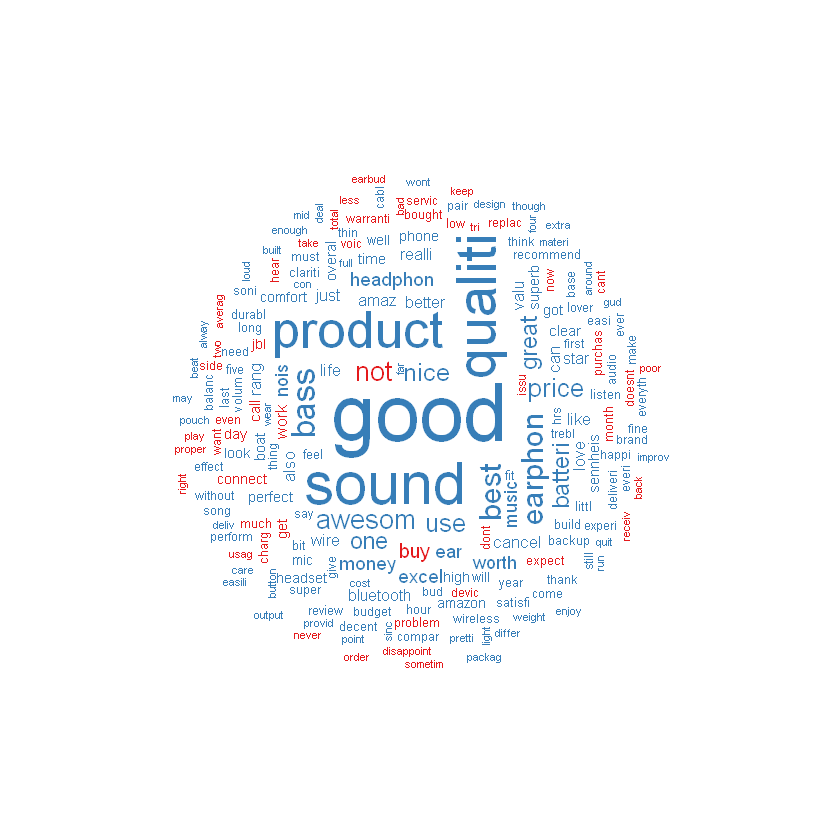

In [54]:
set.seed(100)
data = head(good_tf[order(-good_tf$tot_count),], 200)

cat('Word Cloud: Good reviews\n')
cat('Words unique to good reviews are highlighted in red')

wordcloud(words = data$terms, 
          freq = data$tot_count, 
          #min.freq = 100,
          random.order = FALSE,
          rot.per = .35,
          ordered.colors = TRUE,
          colors = brewer.pal(8, 'Set1')[as.factor(data$tf1_higherFreq)])

Word Cloud: Good reviews
Words unique to good reviews are highlighted in red
Top 5 words

,terms,avg_count,tot_count,doc_freq,tf1_higherFreq,tf2_avg_count,tf2_tot_count,tf2_doc_freq,weight,weighted_count,weighted_count_scaled
superb,superb,0.05530738,520,457,1,0.002431611,12,12,3.9923243,0.22080500,1.0000000
awesom,awesom,0.19495852,1833,1457,1,0.014387031,71,58,0.9347306,0.18223369,0.9914686
best,best,0.23356733,2196,1630,1,0.026950355,133,107,0.2318526,0.05415318,0.9375459
excel,excel,0.10082961,948,756,1,0.009321175,46,40,0.4481356,0.04518534,0.9295009
love,love,0.07583493,713,620,1,0.006484296,32,30,0.5727910,0.04343757,0.9277479


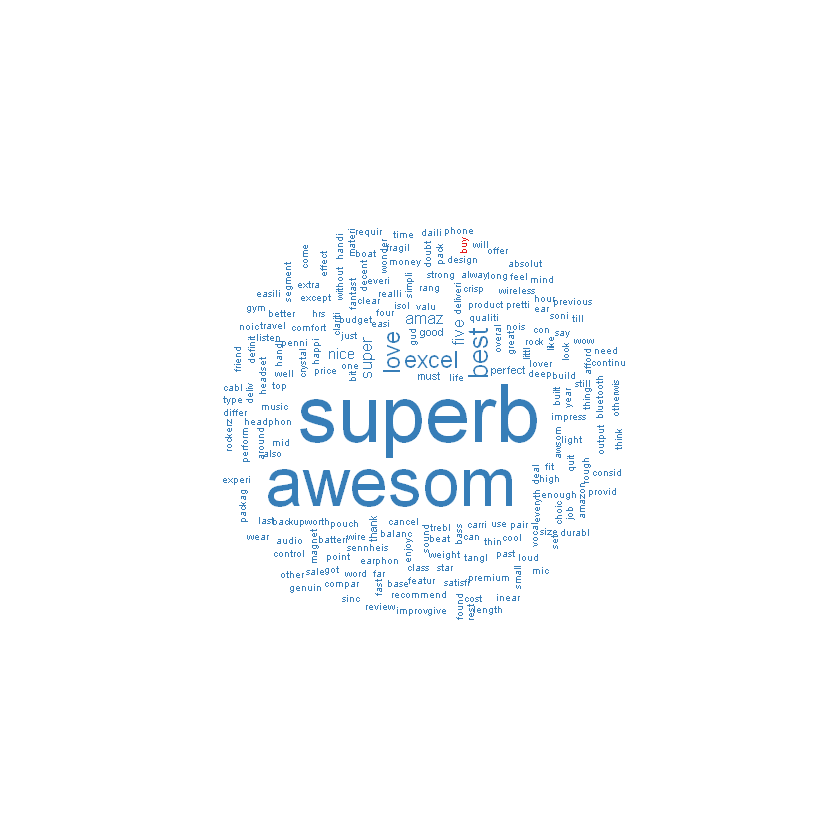

In [55]:
set.seed(100)
data = head(good_tf[order(-good_tf$weighted_count),], 200)

# Same word cloud, but emphasize the words unique to good reviews
cat('Word Cloud: Good reviews\n')
cat('Words unique to good reviews are highlighted in red')
cat('\n')
cat('Top 5 words')
head(data, 5)


wordcloud(words = data$terms, 
          freq = data$weighted_count, 
          random.order = FALSE,
          rot.per = .35,
          ordered.colors = TRUE,
          colors = brewer.pal(8, 'Set1')[factor(data$tf1_higherFreq)])

Word Cloud: Bad reviews
Words more common in bad reviews are blue
Top 5 words

,terms,avg_count,tot_count,doc_freq,tf2_higherFreq,tf1_avg_count,tf1_tot_count,tf1_doc_freq,weight,weighted_count,weighted_count_scaled
not,not,0.9005066,4444,2785,1,0.20463731,1924,1468,3.907357e-03,3.518600e-03,0.8156591
product,product,0.5495441,2712,1746,0,0.49329930,4638,3335,6.910544e-05,3.797648e-05,0.6253122
qualiti,qualiti,0.4944276,2440,1720,0,0.54222506,5098,3799,4.003917e-05,1.979647e-05,0.5979313
sound,sound,0.4753799,2346,1710,0,0.58338651,5485,4250,2.841554e-05,1.350818e-05,0.5818672
good,good,0.4579534,2260,1570,0,0.82705807,7776,4836,1.058677e-05,4.848249e-06,0.5388001
work,work,0.3602837,1778,1278,1,0.07668581,721,617,4.862780e-03,1.751980e-03,0.7863510
one,one,0.2218845,1095,879,0,0.15241438,1433,1146,1.728964e-04,3.836304e-05,0.6257379
earphon,earphon,0.2208713,1090,770,0,0.24356520,2290,1534,4.390291e-05,9.696894e-06,0.5679347
month,month,0.2115502,1044,862,1,0.03967241,373,340,7.667568e-03,1.622075e-03,0.7831130
bass,bass,0.1975684,975,664,0,0.26738992,2514,1964,1.963140e-05,3.878544e-06,0.5294208


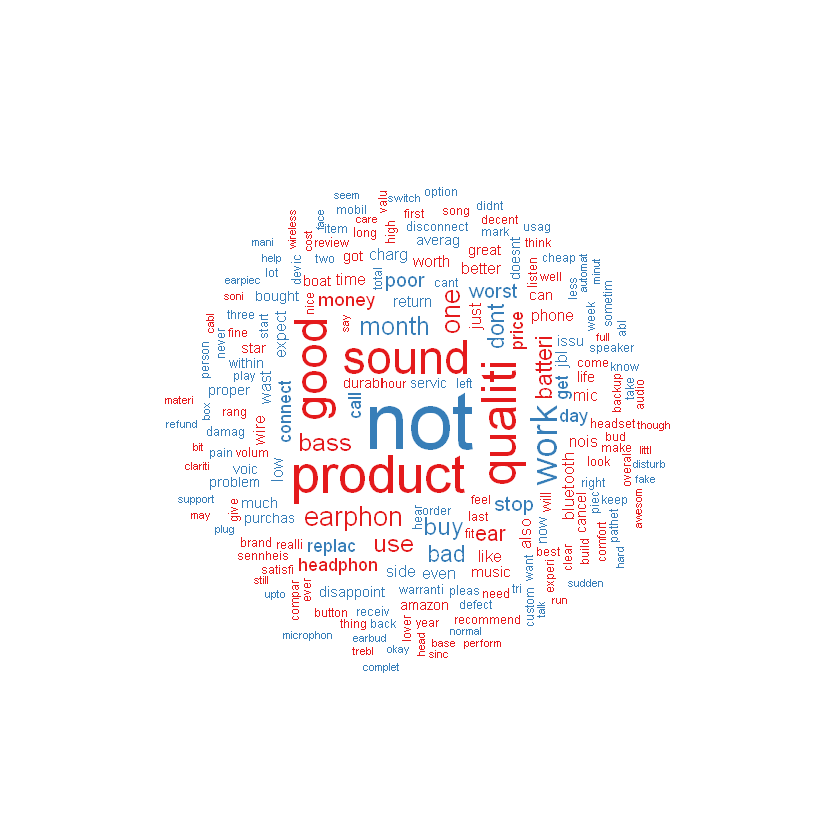

In [56]:
set.seed(100)
data = head(bad_tf[order(-bad_tf$tot_count),], 200)

# View the data in a wordcloud
cat('Word Cloud: Bad reviews\n')
cat('Words more common in bad reviews are blue')
cat('\n')
cat('Top 5 words')
head(data, 10)

wordcloud(words = data$terms, 
          freq = data$tot_count, 
          max.words = 200,
          random.order = FALSE,
          random.color = FALSE,
          rot.per = .35,
          ordered.colors = TRUE,
          colors = brewer.pal(8, 'Set1')[factor(data$tf2_higherFreq)])

Word Cloud: Bad reviews
Words more common in bad reviews are blue
Top 5 words

,terms,avg_count,tot_count,doc_freq,tf2_higherFreq,tf1_avg_count,tf1_tot_count,tf1_doc_freq,weight,weighted_count,weighted_count_scaled
worst,worst,0.13333333,658,466,1,0.003722612,35,30,2.11946522,0.282595362,1.0000000
wast,wast,0.07558257,373,307,1,0.002446288,23,22,1.41684917,0.107089106,0.9592161
stop,stop,0.14407295,711,559,1,0.008721549,82,76,0.21347924,0.030756583,0.9067815
return,return,0.07639311,377,320,1,0.005211657,49,43,0.17006620,0.012991886,0.8705611
poor,poor,0.13191489,651,511,1,0.011699638,110,99,0.06979242,0.009206659,0.8560861


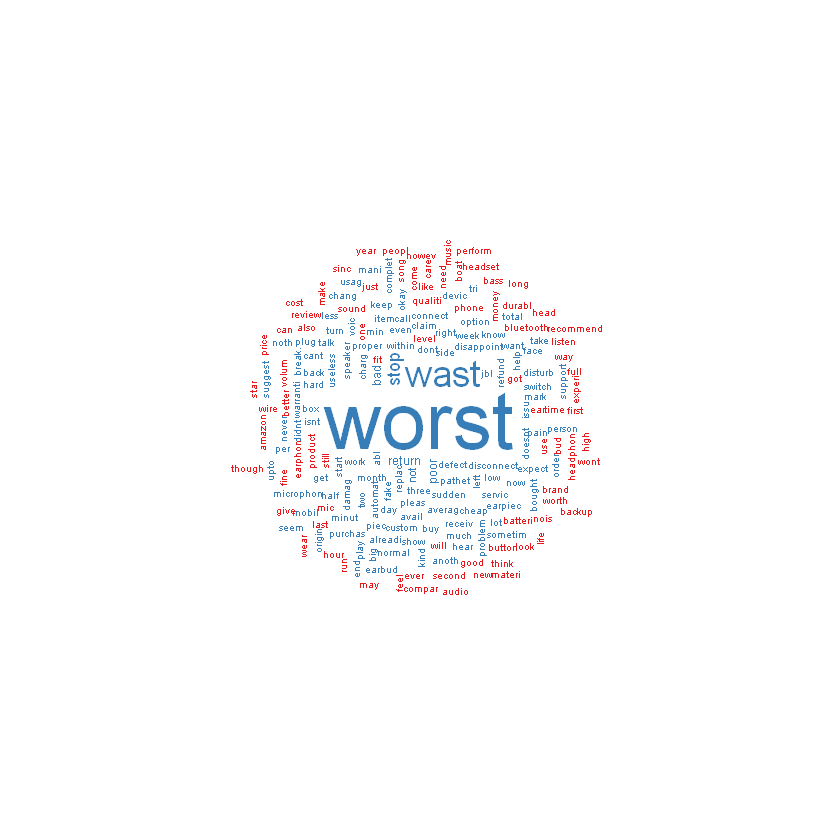

In [57]:
set.seed(100)
data = head(bad_tf[order(-bad_tf$weighted_count),], 200)

# Same word cloud, but emphasize the words unique to good reviews
cat('Word Cloud: Bad reviews\n')
cat('Words more common in bad reviews are blue')
cat('\n')
cat('Top 5 words')
head(data, 5)

wordcloud(words = data$terms, 
          freq = data$weighted_count, 
          random.order = FALSE,
          random.color = FALSE,
          ordered.colors = TRUE,
          rot.per = .35,
          colors = brewer.pal(8, 'Set1')[factor(data$tf2_higherFreq)])

## Analysis of results

By adding a weight to punish words shared between sets based on the relative proportion of total importance between sets, the resulting list of important words is much more indicative of review content.

The good reviews have a lot shared words at the top of the list ('good', 'best', 'product') while the bad reviews have more unique words at the top ('bad', 'worst', 'work').

The good reviews mainly had words indicating customer sentiment, though there were a few words noting physical features ('sound', 'batteri', 'bass'). The bad reviews similarly had customer sentiment terms, but they included more words noting physical features. These include the aforementioned words from the good reviews, but also include words like 'mic', 'connect', 'call'. 

An interesting unique term from the top of the bad review DTM is 'month.' This is likely referring to the one month return policy on Amazon, or that the product may have stopped working after a month.
